In [276]:
%env KERAS_BACKEND=tensorflow
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
from keras.utils import np_utils
import matplotlib as mpl

mpl.rc('font', family='Noto Sans CJK TC')

env: KERAS_BACKEND=tensorflow


In [277]:
x_train[1234].shape

(28, 28)

### 由於圖片有ＲＧＢ所以我們要把它轉成 [x,y,z] 這樣的三個矩陣

In [278]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [279]:
x_train[1234].shape

(28, 28, 1)

### 轉成 1~10  [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.

In [280]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

### normalize

In [281]:
x_train_norm=(x_train - x_train.min())/(x_train.max()-x_train.min())
x_test_norm=(x_test - x_test.min())/(x_test.max()-x_test.min())

## 用成ＣＮＮ

In [282]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Flatten#(拉平)
from keras.layers import Conv2D ,MaxPool2D
from keras.optimizers import SGD,Adam

In [283]:
model = Sequential ()

In [199]:
model.add(Conv2D(8,(5,5),padding='same',input_shape=(28,28,1))) #第一層 4個 filter size 5*5 
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model.add(Activation('selu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [200]:
model.add(Flatten())
#model.add(Dense(87))
#model.add(Activation('relu'))
#model.add(Dense(36))
#model.add(Activation('relu'))
model.add(Dense(8+9))
model.add(Activation('elu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [201]:
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0xb346bc470>>

In [202]:
model.compile(loss='categorical_crossentropy',
                    optimizer=Adam(),
                      metrics =['accuracy'])

In [203]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
activation_99 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 14, 14, 16)        3216      
_________________________________________________________________
activation_100 (Activation)  (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 7, 7, 32)          12832     
__________

In [204]:
model_0=model.fit(x_train_norm,y_train,batch_size=150,epochs=13)

Epoch 1/13
60000/60000 [==============================] - 32s 541us/step - loss: 0.3244 - acc: 0.9081
Epoch 2/13
60000/60000 [==============================] - 33s 555us/step - loss: 0.0809 - acc: 0.9758
Epoch 3/13
60000/60000 [==============================] - 32s 542us/step - loss: 0.0557 - acc: 0.9831
Epoch 4/13
60000/60000 [==============================] - 31s 522us/step - loss: 0.0441 - acc: 0.9862
Epoch 5/13
60000/60000 [==============================] - 32s 529us/step - loss: 0.0367 - acc: 0.9886
Epoch 6/13
60000/60000 [==============================] - 33s 554us/step - loss: 0.0302 - acc: 0.9905
Epoch 7/13
60000/60000 [==============================] - 33s 543us/step - loss: 0.0260 - acc: 0.9918
Epoch 8/13
60000/60000 [==============================] - 33s 546us/step - loss: 0.0216 - acc: 0.9932
Epoch 9/13
60000/60000 [==============================] - 35s 576us/step - loss: 0.0189 - acc: 0.9934
Epoch 10/13
60000/60000 [==============================] - 34s 559us/step - loss: 

In [205]:
## 想看看不同層數對他的影響 

In [206]:
y_train1 = np_utils.to_categorical(y_train,10)
y_test1 = np_utils.to_categorical(y_test,10)

In [207]:
x_train_norm1=(x_train - x_train.min())/(x_train.max()-x_train.min())
x_test_norm1=(x_test - x_test.min())/(x_test.max()-x_test.min())

In [208]:
model_1 = Sequential ()
model_1.add(Conv2D(8,(5,5),padding='same',input_shape=(28,28,1))) #第一層 4個 filter size 5*5 
model_1.add(Activation('elu'))
model_1.add(MaxPool2D(pool_size=(2,2)))

model_1.add(Conv2D(16,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model_1.add(Activation('selu'))
model_1.add(MaxPool2D(pool_size=(2,2)))

model_1.add(Conv2D(32,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model_1.add(Activation('relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))

In [209]:
model_1.add(Flatten())
#model.add(Dense(87))
#model.add(Activation('relu'))
model_1.add(Dense(36))
model_1.add(Activation('relu'))
#model.add(Dense(8+9))
#model.add(Activation('elu'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

In [210]:
model_1.compile(loss='categorical_crossentropy',
                    optimizer=Adam(),
                      metrics =['accuracy'])

In [211]:
model_1=model_1.fit(x_train_norm,y_train,batch_size=150,epochs=13)

Epoch 1/13
60000/60000 [==============================] - 35s 579us/step - loss: 0.3241 - acc: 0.9014
Epoch 2/13
60000/60000 [==============================] - 35s 589us/step - loss: 0.0823 - acc: 0.9749
Epoch 3/13
60000/60000 [==============================] - 31s 522us/step - loss: 0.0594 - acc: 0.9814
Epoch 4/13
60000/60000 [==============================] - 32s 525us/step - loss: 0.0463 - acc: 0.9853
Epoch 5/13
60000/60000 [==============================] - 30s 505us/step - loss: 0.0374 - acc: 0.9883
Epoch 6/13
60000/60000 [==============================] - 31s 509us/step - loss: 0.0301 - acc: 0.9911
Epoch 7/13
60000/60000 [==============================] - 31s 511us/step - loss: 0.0269 - acc: 0.9910
Epoch 8/13
60000/60000 [==============================] - 31s 513us/step - loss: 0.0232 - acc: 0.9926
Epoch 9/13
60000/60000 [==============================] - 31s 518us/step - loss: 0.0197 - acc: 0.9940
Epoch 10/13
60000/60000 [==============================] - 31s 522us/step - loss: 

In [217]:
##來看看不同 activation 對他的影響

In [218]:
model_2 = Sequential ()
model_2.add(Conv2D(8,(5,5),padding='same',input_shape=(28,28,1))) #第一層 4個 filter size 5*5 
model_2.add(Activation('selu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

model_2.add(Conv2D(16,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model_2.add(Activation('selu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

model_2.add(Conv2D(32,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model_2.add(Activation('selu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

In [219]:
model_2.add(Flatten())
#model.add(Dense(87))
#model.add(Activation('relu'))
model_2.add(Dense(36))
model_2.add(Activation('selu'))
#model.add(Dense(8+9))
#model.add(Activation('elu'))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

In [220]:
model_2.compile(loss='categorical_crossentropy',
                    optimizer=Adam(),
                      metrics =['accuracy'])

In [222]:
model_2=model_2.fit(x_train_norm,y_train,batch_size=150,epochs=13)

Epoch 1/13
60000/60000 [==============================] - 39s 656us/step - loss: 0.2621 - acc: 0.9231
Epoch 2/13
60000/60000 [==============================] - 36s 608us/step - loss: 0.0676 - acc: 0.9791
Epoch 3/13
60000/60000 [==============================] - 37s 613us/step - loss: 0.0475 - acc: 0.9855
Epoch 4/13
60000/60000 [==============================] - 37s 622us/step - loss: 0.0389 - acc: 0.9876
Epoch 5/13
60000/60000 [==============================] - 38s 628us/step - loss: 0.0297 - acc: 0.9905
Epoch 6/13
60000/60000 [==============================] - 37s 619us/step - loss: 0.0268 - acc: 0.9912
Epoch 7/13
60000/60000 [==============================] - 37s 618us/step - loss: 0.0217 - acc: 0.9928
Epoch 8/13
60000/60000 [==============================] - 38s 639us/step - loss: 0.0176 - acc: 0.9946
Epoch 9/13
60000/60000 [==============================] - 40s 665us/step - loss: 0.0149 - acc: 0.9949
Epoch 10/13
60000/60000 [==============================] - 39s 654us/step - loss: 

In [223]:
## 如果都用 relu 會怎樣

In [224]:
model_3 = Sequential ()
model_3.add(Conv2D(8,(5,5),padding='same',input_shape=(28,28,1))) #第一層 4個 filter size 5*5 
model_3.add(Activation('relu'))
model_3.add(MaxPool2D(pool_size=(2,2)))

model_3.add(Conv2D(16,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model_3.add(Activation('relu'))
model_3.add(MaxPool2D(pool_size=(2,2)))

model_3.add(Conv2D(32,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model_3.add(Activation('relu'))
model_3.add(MaxPool2D(pool_size=(2,2)))

In [225]:
model_3.add(Flatten())
#model.add(Dense(87))
#model.add(Activation('relu'))
model_3.add(Dense(36))
model_3.add(Activation('relu'))
#model.add(Dense(8+9))
#model.add(Activation('elu'))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))

In [226]:
model_3.compile(loss='categorical_crossentropy',
                    optimizer=Adam(),
                      metrics =['accuracy'])

In [227]:
model_3=model_3.fit(x_train_norm,y_train,batch_size=150,epochs=13)

Epoch 1/13
60000/60000 [==============================] - 32s 529us/step - loss: 0.3804 - acc: 0.8847
Epoch 2/13
60000/60000 [==============================] - 35s 579us/step - loss: 0.0969 - acc: 0.9711
Epoch 3/13
60000/60000 [==============================] - 30s 504us/step - loss: 0.0683 - acc: 0.9789
Epoch 4/13
60000/60000 [==============================] - 31s 512us/step - loss: 0.0524 - acc: 0.9836
Epoch 5/13
60000/60000 [==============================] - 30s 501us/step - loss: 0.0434 - acc: 0.9863
Epoch 6/13
60000/60000 [==============================] - 30s 505us/step - loss: 0.0370 - acc: 0.9880
Epoch 7/13
60000/60000 [==============================] - 30s 505us/step - loss: 0.0317 - acc: 0.9902
Epoch 8/13
60000/60000 [==============================] - 30s 506us/step - loss: 0.0286 - acc: 0.9911
Epoch 9/13
60000/60000 [==============================] - 31s 524us/step - loss: 0.0244 - acc: 0.9919
Epoch 10/13
60000/60000 [==============================] - 31s 522us/step - loss: 

In [228]:
## 如果都用 elu

In [229]:
model_4 = Sequential ()
model_4.add(Conv2D(8,(5,5),padding='same',input_shape=(28,28,1))) #第一層 4個 filter size 5*5 
model_4.add(Activation('elu'))
model_4.add(MaxPool2D(pool_size=(2,2)))

model_4.add(Conv2D(16,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model_4.add(Activation('elu'))
model_4.add(MaxPool2D(pool_size=(2,2)))

model_4.add(Conv2D(32,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model_4.add(Activation('elu'))
model_4.add(MaxPool2D(pool_size=(2,2)))

In [230]:
model_4.add(Flatten())
#model.add(Dense(87))
#model.add(Activation('relu'))
model_4.add(Dense(36))
model_4.add(Activation('elu'))
#model.add(Dense(8+9))
#model.add(Activation('elu'))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))

In [231]:
model_4.compile(loss='categorical_crossentropy',
                    optimizer=Adam(),
                      metrics =['accuracy'])

In [232]:
model_4=model_4.fit(x_train_norm,y_train,batch_size=150,epochs=13)

Epoch 1/13
60000/60000 [==============================] - 31s 515us/step - loss: 0.2798 - acc: 0.9171
Epoch 2/13
60000/60000 [==============================] - 30s 493us/step - loss: 0.0687 - acc: 0.9788
Epoch 3/13
60000/60000 [==============================] - 29s 488us/step - loss: 0.0467 - acc: 0.9849
Epoch 4/13
60000/60000 [==============================] - 29s 488us/step - loss: 0.0361 - acc: 0.9886
Epoch 5/13
60000/60000 [==============================] - 30s 497us/step - loss: 0.0286 - acc: 0.9910
Epoch 6/13
60000/60000 [==============================] - 30s 493us/step - loss: 0.0231 - acc: 0.9925
Epoch 7/13
60000/60000 [==============================] - 30s 493us/step - loss: 0.0196 - acc: 0.9938
Epoch 8/13
60000/60000 [==============================] - 30s 497us/step - loss: 0.0171 - acc: 0.9942
Epoch 9/13
60000/60000 [==============================] - 31s 511us/step - loss: 0.0139 - acc: 0.9954
Epoch 10/13
60000/60000 [==============================] - 31s 525us/step - loss: 

In [233]:
## 試試看除了 Nadam 的

In [284]:
from keras.optimizers import SGD,Adam,Nadam

In [285]:
model_5 = Sequential ()
model_5.add(Conv2D(8,(5,5),padding='same',input_shape=(28,28,1))) #第一層 4個 filter size 5*5 
model_5.add(Activation('elu'))
model_5.add(MaxPool2D(pool_size=(2,2)))

model_5.add(Conv2D(16,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model_5.add(Activation('elu'))
model_5.add(MaxPool2D(pool_size=(2,2)))

model_5.add(Conv2D(32,(5,5),padding='same')) #第二層 8個 filter size 5*5 
model_5.add(Activation('elu'))
model_5.add(MaxPool2D(pool_size=(2,2)))

In [286]:
model_5.add(Flatten())
#model.add(Dense(87))
#model.add(Activation('relu'))
model_5.add(Dense(36))
model_5.add(Activation('elu'))
#model.add(Dense(8+9))
#model.add(Activation('elu'))
model_5.add(Dense(10))
model_5.add(Activation('softmax'))

In [287]:
model_5.compile(loss='categorical_crossentropy',
                    optimizer=Nadam(),
                      metrics =['accuracy'])

In [288]:
model_5tr=model_5.fit(x_train_norm,y_train,batch_size=150,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 32s 532us/step - loss: 0.2116 - acc: 0.9352
Epoch 2/5
60000/60000 [==============================] - 29s 487us/step - loss: 0.0578 - acc: 0.9818
Epoch 3/5
60000/60000 [==============================] - 29s 486us/step - loss: 0.0402 - acc: 0.9867
Epoch 4/5
60000/60000 [==============================] - 29s 489us/step - loss: 0.0301 - acc: 0.9905
Epoch 5/5
60000/60000 [==============================] - 30s 493us/step - loss: 0.0232 - acc: 0.9926


In [290]:
model_5.evaluate(x_test_norm,y_test)

10000/10000 [==============================] - 3s 273us/step


[0.03571454932804336, 0.9888]

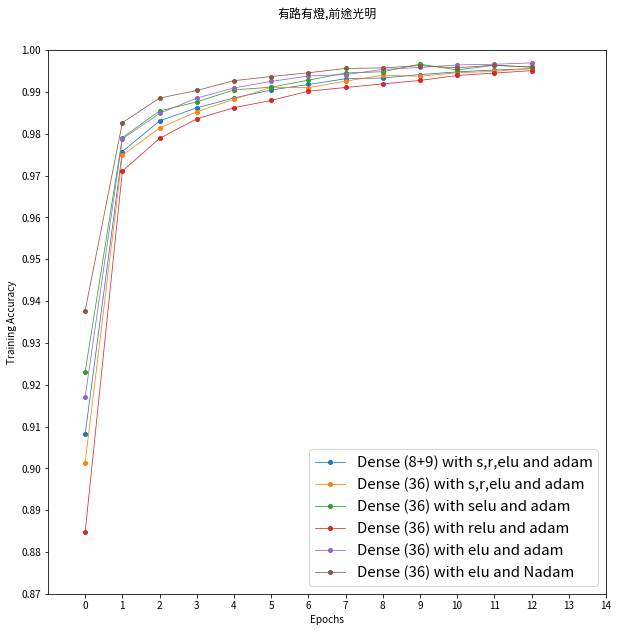

In [266]:
fig = plt.figure(figsize=(10,10))
ax = plt.plot(model_0.history['acc'], marker = 'o', markersize = 4.0, lw = 0.75, label = 'Dense (8+9) with s,r,elu and adam' )
ax = plt.plot(model_1.history['acc'], marker = 'o', markersize = 4.0, lw = 0.75, label = 'Dense (36) with s,r,elu and adam')
ax = plt.plot(model_2.history['acc'], marker = 'o', markersize = 4.0, lw = 0.75, label = 'Dense (36) with selu and adam')
ax = plt.plot(model_3.history['acc'], marker = 'o', markersize = 4.0, lw = 0.75, label = 'Dense (36) with relu and adam')
ax = plt.plot(model_4.history['acc'], marker = 'o', markersize = 4.0, lw = 0.75, label = 'Dense (36) with elu and adam')
ax = plt.plot(model_5.history['acc'], marker = 'o', markersize = 4.0, lw = 0.75, label = 'Dense (36) with elu and Nadam')
ax = plt.legend(loc='best',prop={'size':15})
ax = plt.xlim(-1,14) # x 軸range 
ax = plt.xticks(np.linspace(0,14,15)) # X軸刻度(開始,結束,有幾個空格)
ax = plt.ylim(0.87,1) # y 軸 range
ax = plt.yticks(np.linspace(0.87,1.0,14)) # y軸刻度(開始,結束,有幾個空格)
ax = plt.title('有路有燈,前途光明', y=1.05)
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Training Accuracy')